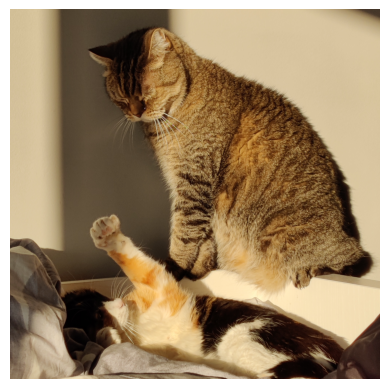

In [159]:
import matplotlib.pyplot as plt
import numpy as np

img = plt.imread("../demos/cat.png")
plt.imshow(img)
plt.axis("off")
plt.show()

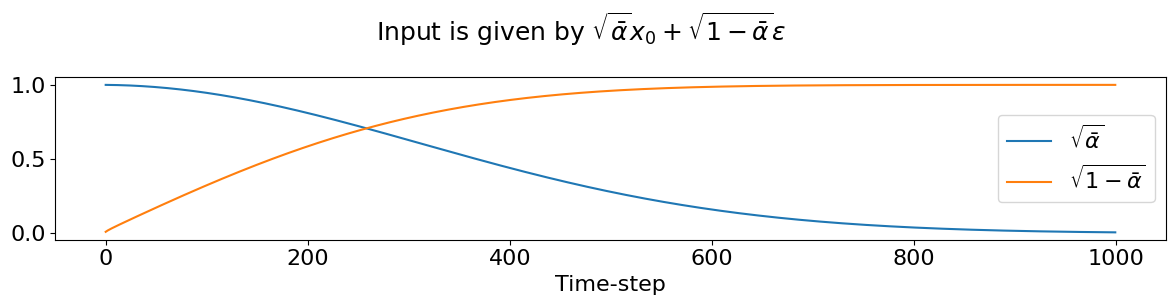

In [160]:
import numpy as np
import matplotlib.pyplot as plt

# Generate data
betas = np.linspace(1e-4, 0.02, 1000)
alphas = 1 - betas
alphas_bar = np.cumprod(alphas, axis=0)

t = np.arange(1000)
image_coefficient = np.sqrt(alphas_bar)
noise_coefficient = np.sqrt(1 - alphas_bar)

# Create figure
fig, ax = plt.subplots(figsize=(12, 3))  # Use subplots to get an Axes object
fig.suptitle(r"Input is given by $\sqrt{\bar{\alpha}} x_0 + \sqrt{1 - \bar{\alpha}} \epsilon$", fontsize=18, y=1)

# Plot data
ax.plot(t, image_coefficient, label=r"$\sqrt{\bar{\alpha}}$")
ax.plot(t, noise_coefficient, label=r"$\sqrt{1 - \bar{\alpha}}$")
ax.set_xlabel("Time-step", fontsize=16)
ax.tick_params(axis='both', labelsize=16)
ax.legend(fontsize=16, loc="right")

# Show plot
plt.tight_layout()
plt.savefig("../img/trend_explanation_plot.svg")
plt.show()



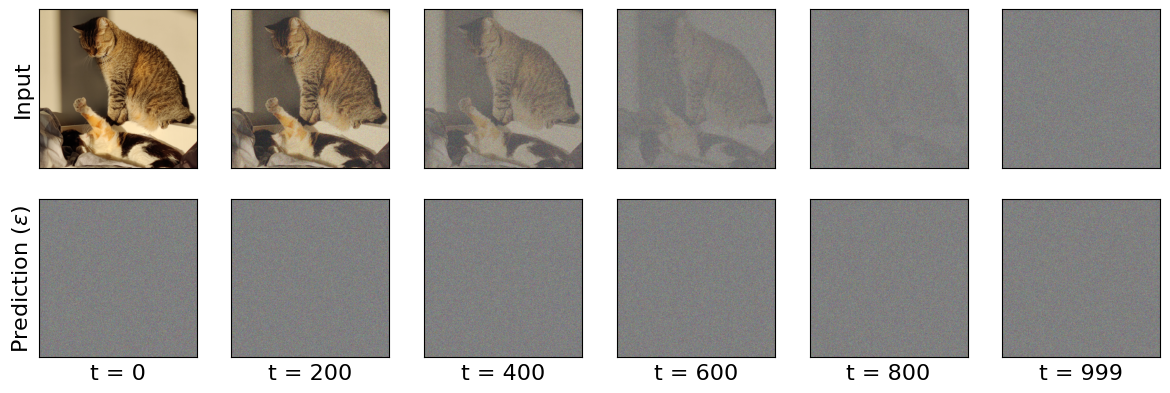

In [161]:
import numpy as np
import matplotlib.pyplot as plt

# Generate x values
x = np.linspace(-2, 2, 400)

# Create figure with 3 rows and 6 columns
fig, axs = plt.subplots(2, 6, figsize=(12, 4))

# Time steps for the images
ts = (0, 200, 400, 600, 800, 999)

for i, t in enumerate(ts):
    # img = np.random.uniform(size=(25,25))
    noise = np.random.normal(size=img.shape)
    noisy_image = np.sqrt(alphas_bar[t]) * (img * 2 - 1) + np.sqrt(1 - alphas_bar[t]) * noise
    
    axs[0, i].imshow(np.clip((noisy_image + 1) / 2, 0, 1))
    axs[1, i].set_xlabel(f"t = {t}", fontsize=16)
    axs[0, i].set_xticks([])
    axs[0, i].set_yticks([])
    
    axs[1, i].imshow(np.clip((noise + 1) / 2, 0, 1))
    axs[1, i].set_xticks([])
    axs[1, i].set_yticks([])
    
    if i == 0:
        axs[0, i].set_ylabel("Input", fontsize=16)
        axs[1, i].set_ylabel(r"Prediction ($\epsilon$)", fontsize=16)

# Adjust layout to reduce space between plots
plt.tight_layout()  # Adjust padding between subplots
plt.subplots_adjust(hspace=0.2)  # Adjust the top margin
plt.savefig("../img/trend_explanation_images.svg")
plt.show()
